In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # data visualization

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/credit-card-customers-prediction/BankChurners.csv


# Importing libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.naive_bayes import GaussianNB

In [3]:
df = pd.read_csv('/kaggle/input/credit-card-customers-prediction/BankChurners.csv')

In [4]:
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


# Explor and gain insights

The first and last two columns not needed to work on them so i will drop them 


In [5]:
df = df.iloc[:,1:21]
df.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [6]:
df.shape

(10127, 20)

In [7]:
df.isna().sum()

Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

In [8]:
df.dtypes

Attrition_Flag               object
Customer_Age                  int64
Gender                       object
Dependent_count               int64
Education_Level              object
Marital_Status               object
Income_Category              object
Card_Category                object
Months_on_book                int64
Total_Relationship_Count      int64
Months_Inactive_12_mon        int64
Contacts_Count_12_mon         int64
Credit_Limit                float64
Total_Revolving_Bal           int64
Avg_Open_To_Buy             float64
Total_Amt_Chng_Q4_Q1        float64
Total_Trans_Amt               int64
Total_Trans_Ct                int64
Total_Ct_Chng_Q4_Q1         float64
Avg_Utilization_Ratio       float64
dtype: object

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

In [10]:
print('Number of duplicates:',df.duplicated().sum())

Number of duplicates: 0


In [11]:
df.columns

Index(['Attrition_Flag', 'Customer_Age', 'Gender', 'Dependent_count',
       'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category',
       'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

In [12]:
df.groupby("Attrition_Flag").agg({"Customer_Age": "mean"})

,Customer_Age
Attrition_Flag,
Attrited Customer,46.659496
Existing Customer,46.262118


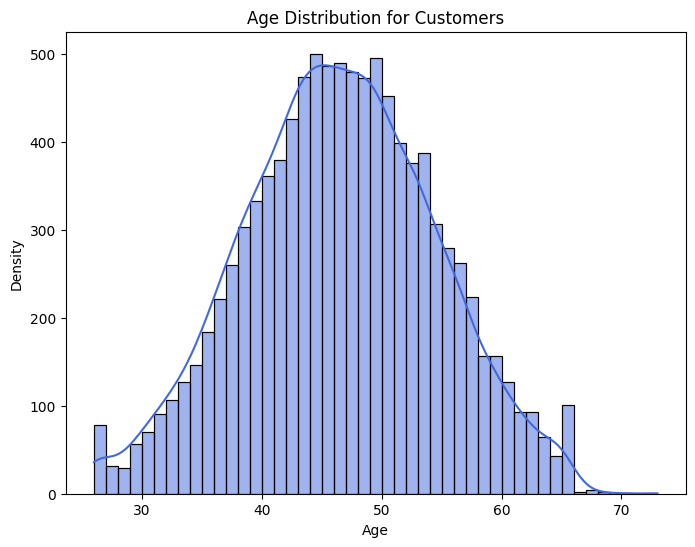

In [13]:
plt.figure(figsize=(8, 6))

sns.histplot(df["Customer_Age"],kde=True,color="royalblue")
plt.title('Age Distribution for Customers')
plt.xlabel('Age')
plt.ylabel('Density')

plt.show()

In [14]:
counts = df.groupby(['Gender', 'Attrition_Flag']).size().reset_index(name='Frequency')
counts

,Gender,Attrition_Flag,Frequency
0,F,Attrited Customer,930
1,F,Existing Customer,4428
2,M,Attrited Customer,697
3,M,Existing Customer,4072


<Figure size 800x600 with 0 Axes>

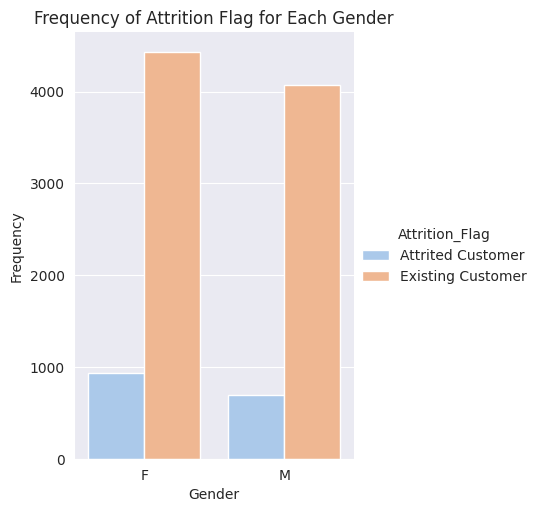

In [15]:
plt.figure(figsize=(8, 6))
sns.set_style("darkgrid")

counts = df.groupby(['Gender', 'Attrition_Flag']).size().reset_index(name='Frequency')

my_palette = sns.color_palette("pastel", 5)

sns.catplot(x='Gender', y='Frequency', hue='Attrition_Flag', data=counts, kind='bar', palette=my_palette, aspect=0.8)
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.title('Frequency of Attrition Flag for Each Gender')

plt.show()

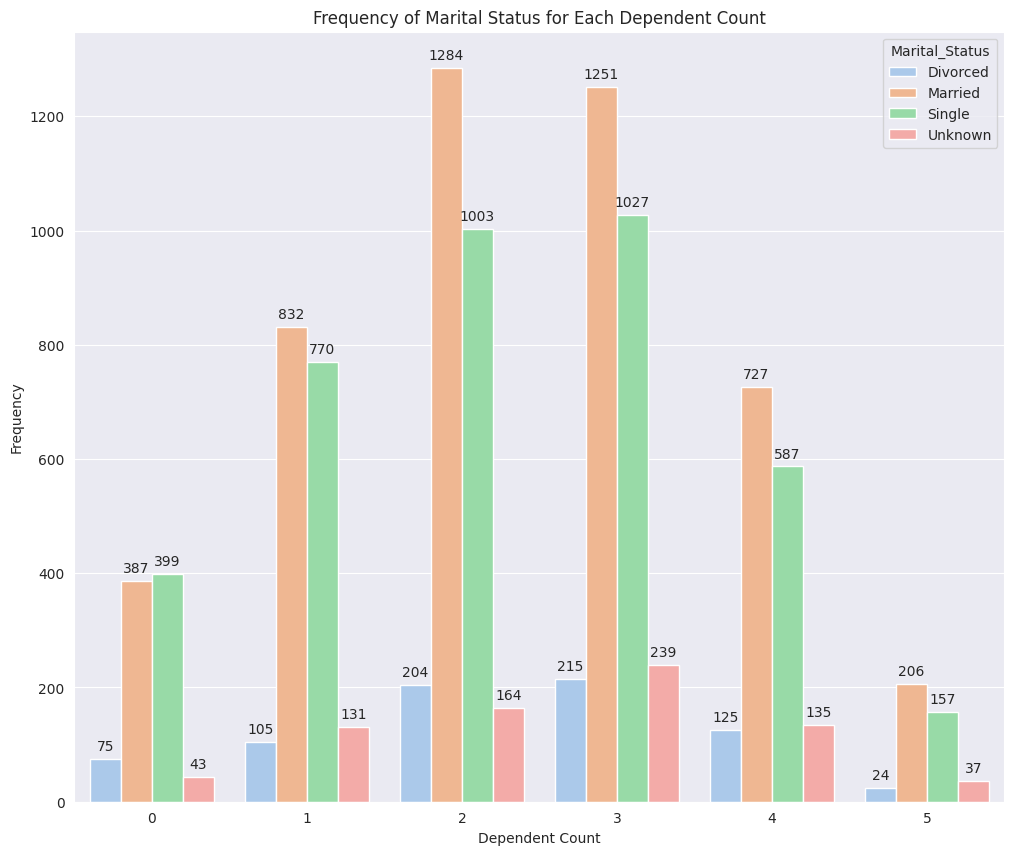

In [16]:
plt.figure(figsize=(12, 10))

counts = df.groupby(['Marital_Status', 'Dependent_count']).size().reset_index(name='Frequency')

my_palette = sns.color_palette("pastel", 5)

sns.set_style("darkgrid")

ax = sns.barplot(x='Dependent_count', y='Frequency', hue='Marital_Status', data=counts, palette=my_palette)

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points')

plt.xlabel('Dependent Count')
plt.ylabel('Frequency')
plt.title('Frequency of Marital Status for Each Dependent Count')

plt.show()


In [17]:
counts = df.groupby(['Education_Level', 'Attrition_Flag']).size().reset_index(name='Frequency')
counts

,Education_Level,Attrition_Flag,Frequency
0,College,Attrited Customer,154
1,College,Existing Customer,859
2,Doctorate,Attrited Customer,95
3,Doctorate,Existing Customer,356
4,Graduate,Attrited Customer,487
5,Graduate,Existing Customer,2641
6,High School,Attrited Customer,306
7,High School,Existing Customer,1707
8,Post-Graduate,Attrited Customer,92
9,Post-Graduate,Existing Customer,424


<Figure size 1200x1000 with 0 Axes>

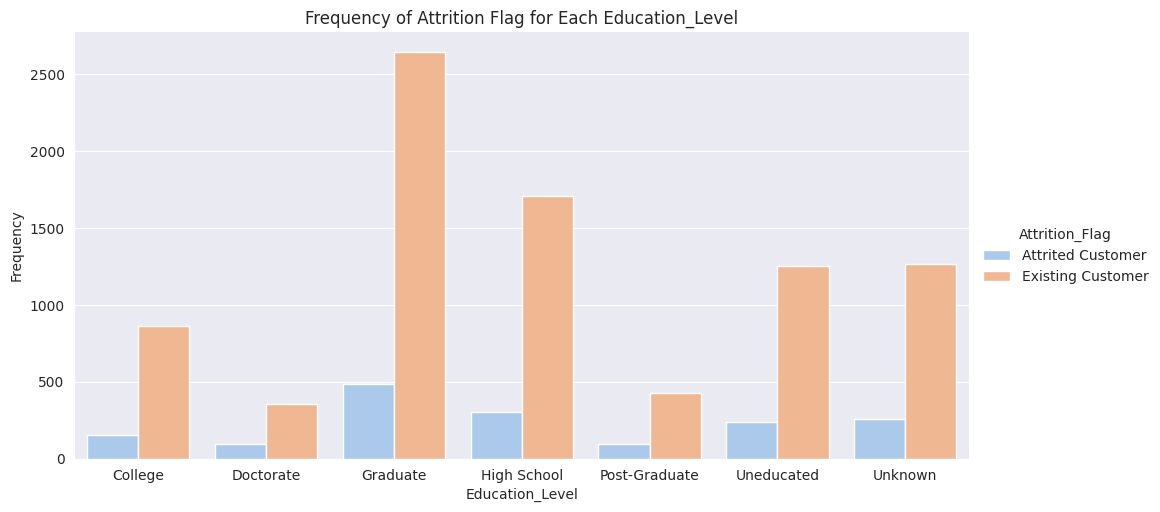

In [18]:
import seaborn as sns
plt.figure(figsize=(12, 10))
sns.set_style("darkgrid")

counts = df.groupby(['Education_Level', 'Attrition_Flag']).size().reset_index(name='Frequency')

my_palette = sns.color_palette("pastel", 5)

sns.catplot(x='Education_Level', y='Frequency', hue='Attrition_Flag', data=counts, kind='bar', palette=my_palette, aspect=2)
plt.xlabel('Education_Level')
plt.ylabel('Frequency')
plt.title('Frequency of Attrition Flag for Each Education_Level')



plt.show()


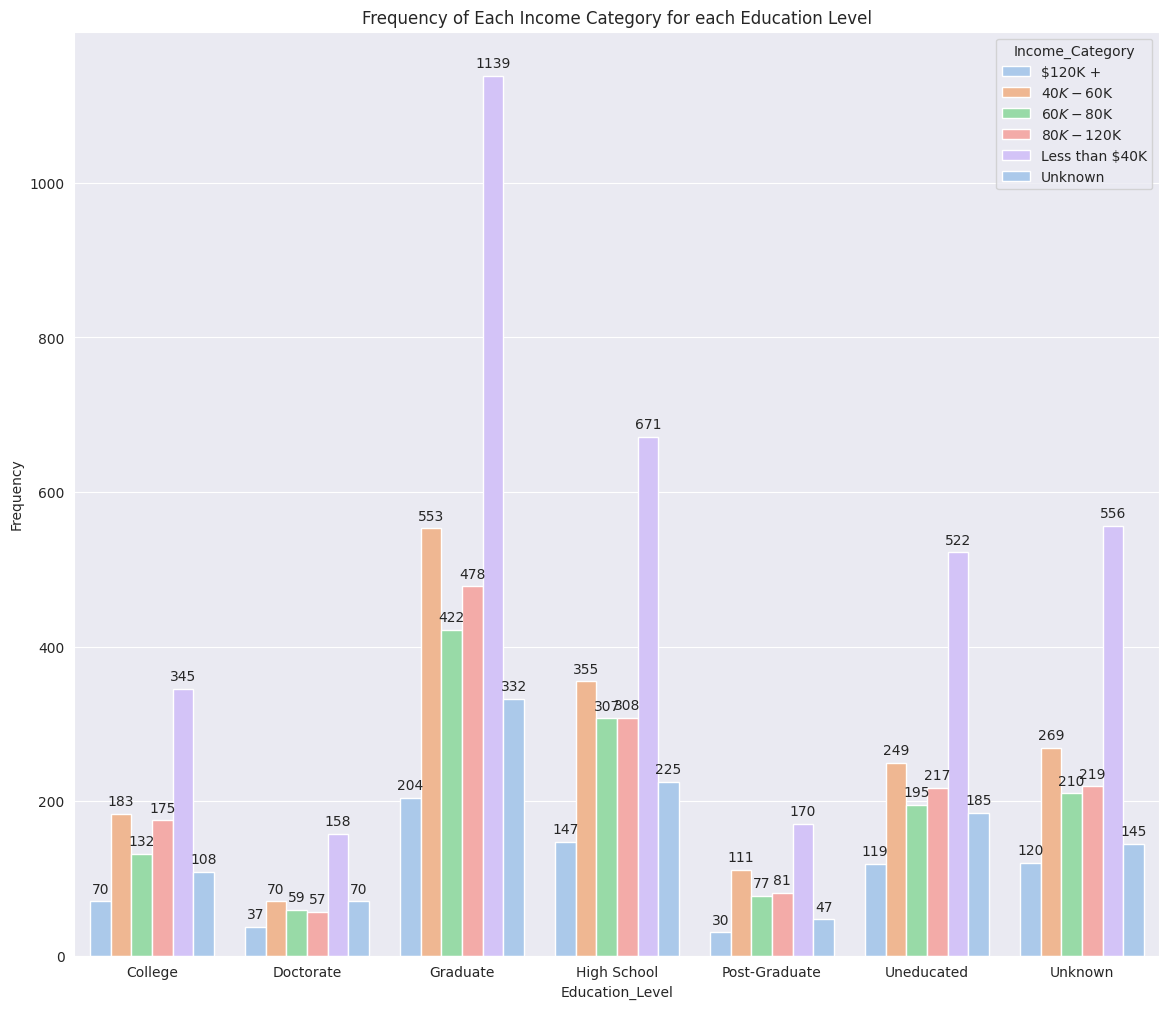

In [19]:
plt.figure(figsize=(14, 12))

counts = df.groupby(['Education_Level', 'Income_Category']).size().reset_index(name='Frequency')

my_palette = sns.color_palette("pastel", 5)

sns.set_style("darkgrid")

ax = sns.barplot(x='Education_Level', y='Frequency', hue='Income_Category', data=counts, palette=my_palette)

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points')

plt.xlabel('Education_Level')
plt.ylabel('Frequency')
plt.title('Frequency of Each Income Category for each Education Level')

plt.show()


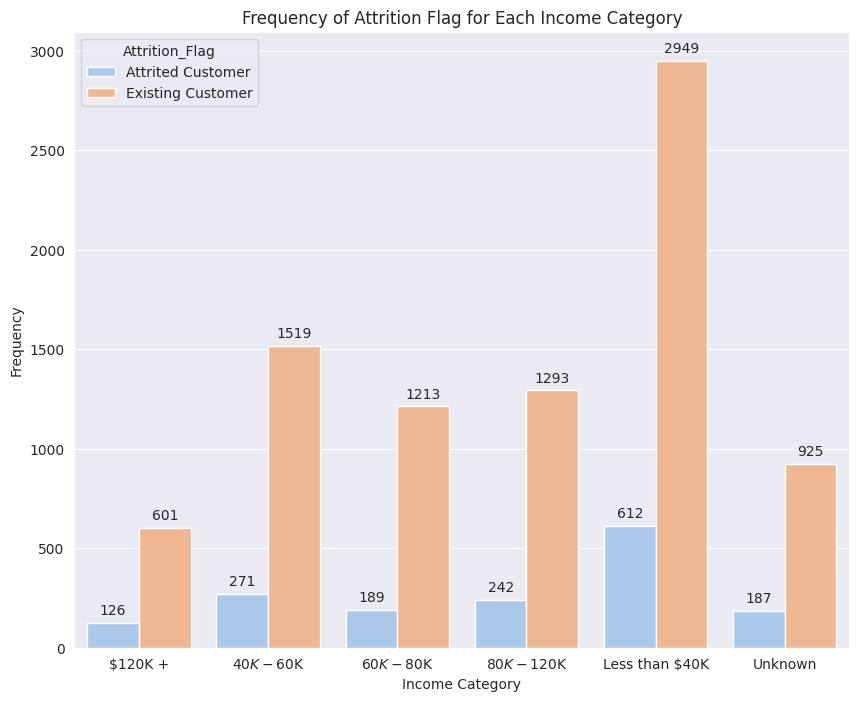

In [20]:
plt.figure(figsize=(10, 8))

counts = df.groupby(['Income_Category', 'Attrition_Flag']).size().reset_index(name='Frequency')

my_palette = sns.color_palette("pastel", 5)

sns.set_style("darkgrid")

ax = sns.barplot(x='Income_Category', y='Frequency', hue='Attrition_Flag', data=counts, palette=my_palette)

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points')

plt.xlabel('Income Category')
plt.ylabel('Frequency')
plt.title('Frequency of Attrition Flag for Each Income Category')

plt.show()


In [21]:
import plotly.graph_objects as go

def create_pie_chart(df, column_name):
    column_data = df[column_name].value_counts()

    labels = column_data.index.tolist()
    values = column_data.values.tolist()

    explode = [0.3] * len(labels)

    fig = go.Figure(data=[go.Pie(labels=labels, values=values, pull=explode)])

    fig.update_layout(title_text='Distribution of ' + 'Card Category')

    fig.show()

create_pie_chart(df, 'Card_Category')


**Distribution of numerical continous columns**

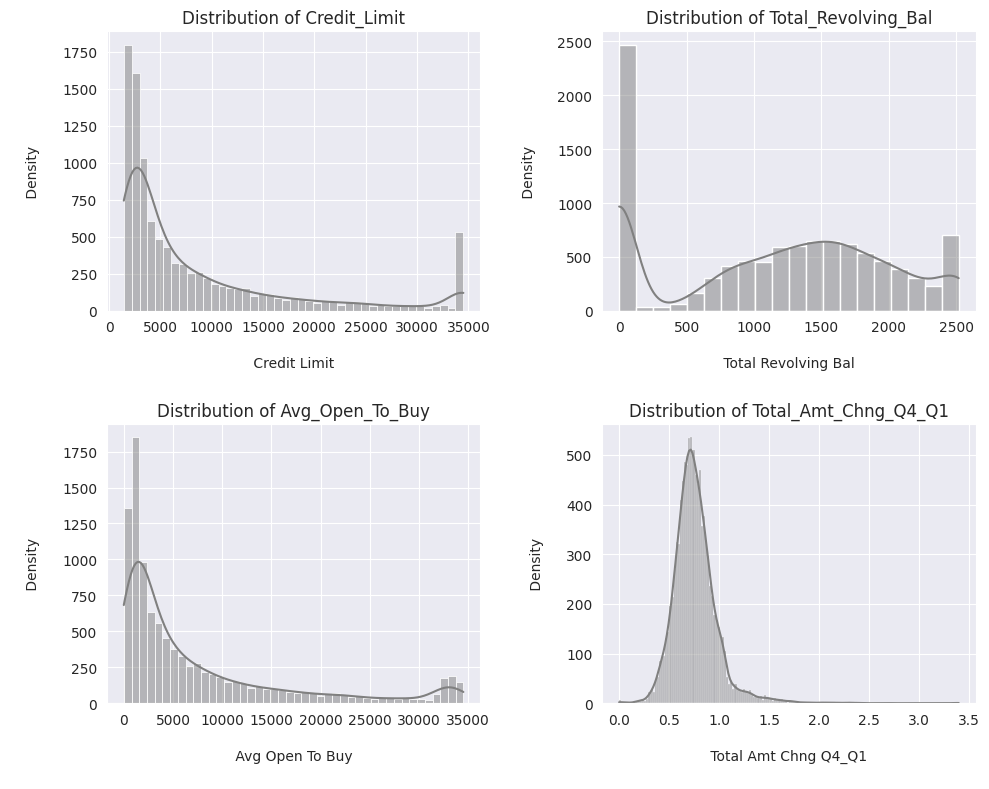

In [22]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))
sns.histplot(df["Credit_Limit"],kde=True,color="grey", ax=axes[0,0])
axes[0,0].set_title('Distribution of Credit_Limit')
axes[0,0].set_xlabel('\n Credit Limit \n')
axes[0,0].set_ylabel('\n Density \n')

sns.histplot(df["Total_Revolving_Bal"],kde=True,color="grey", ax=axes[0,1])
axes[0,1].set_title('Distribution of Total_Revolving_Bal')
axes[0,1].set_xlabel('\n Total Revolving Bal \n')
axes[0,1].set_ylabel('\n Density \n')
plt.tight_layout()

sns.histplot(df["Avg_Open_To_Buy"],kde=True,color="grey", ax=axes[1,0])
axes[1,0].set_title('Distribution of Avg_Open_To_Buy')
axes[1,0].set_xlabel('\n Avg Open To Buy \n')
axes[1,0].set_ylabel('\n Density \n')
plt.tight_layout()

sns.histplot(df["Total_Amt_Chng_Q4_Q1"],kde=True,color="grey", ax=axes[1,1])
axes[1,1].set_title('Distribution of Total_Amt_Chng_Q4_Q1')
axes[1,1].set_xlabel('\n Total Amt Chng Q4_Q1 \n')
axes[1,1].set_ylabel('\n Density \n')
plt.tight_layout()
plt.show()

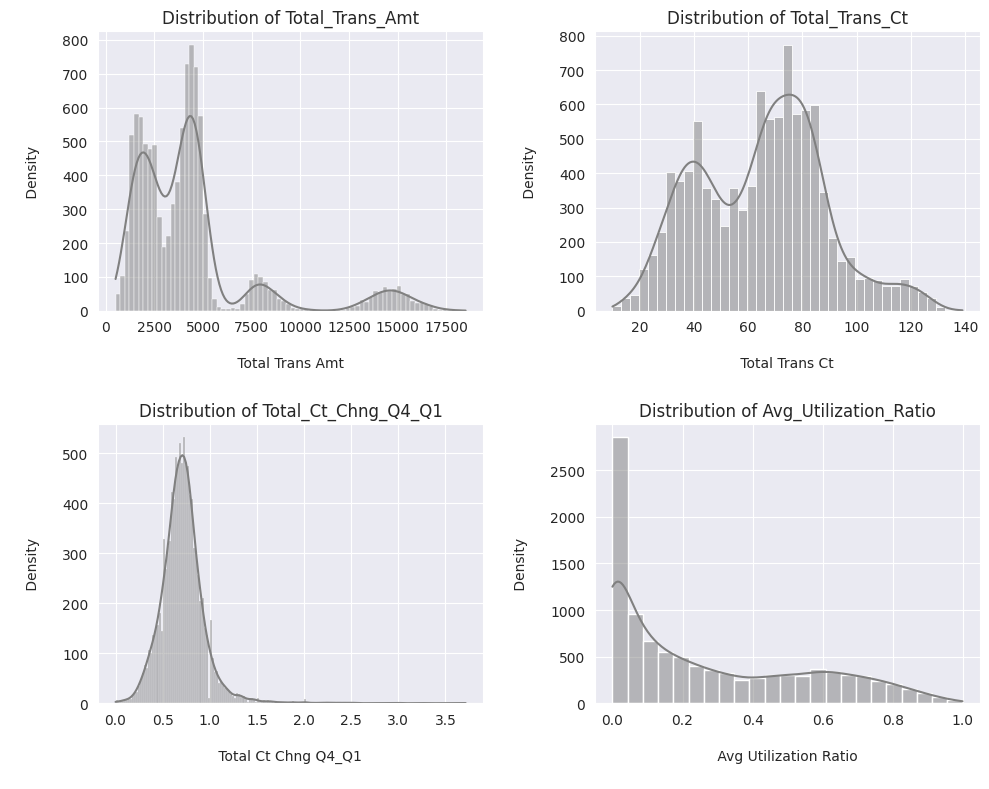

In [23]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))
sns.histplot(df["Total_Trans_Amt"],kde=True,color="grey", ax=axes[0,0])
axes[0,0].set_title('Distribution of Total_Trans_Amt')
axes[0,0].set_xlabel('\n Total Trans Amt \n')
axes[0,0].set_ylabel('\n Density \n')

sns.histplot(df["Total_Trans_Ct"],kde=True,color="grey", ax=axes[0,1])
axes[0,1].set_title('Distribution of Total_Trans_Ct')
axes[0,1].set_xlabel('\n Total Trans Ct \n')
axes[0,1].set_ylabel('\n Density \n')
plt.tight_layout()

sns.histplot(df["Total_Ct_Chng_Q4_Q1"],kde=True,color="grey", ax=axes[1,0])
axes[1,0].set_title('Distribution of Total_Ct_Chng_Q4_Q1')
axes[1,0].set_xlabel('\n Total Ct Chng Q4_Q1 \n')
axes[1,0].set_ylabel('\n Density \n')
plt.tight_layout()

sns.histplot(df["Avg_Utilization_Ratio"],kde=True,color="grey", ax=axes[1,1])
axes[1,1].set_title('Distribution of Avg_Utilization_Ratio')
axes[1,1].set_xlabel('\n Avg Utilization Ratio \n')
axes[1,1].set_ylabel('\n Density \n')
plt.tight_layout()
plt.show()

In [24]:
df['Attrition_Flag'] = df['Attrition_Flag'].map({'Existing Customer':1, 'Attrited Customer':0})

In [25]:
numeric_cols = df.select_dtypes(include=['number']).columns
df_numeric = df[numeric_cols]
correlation_matrix = df_numeric.corr()

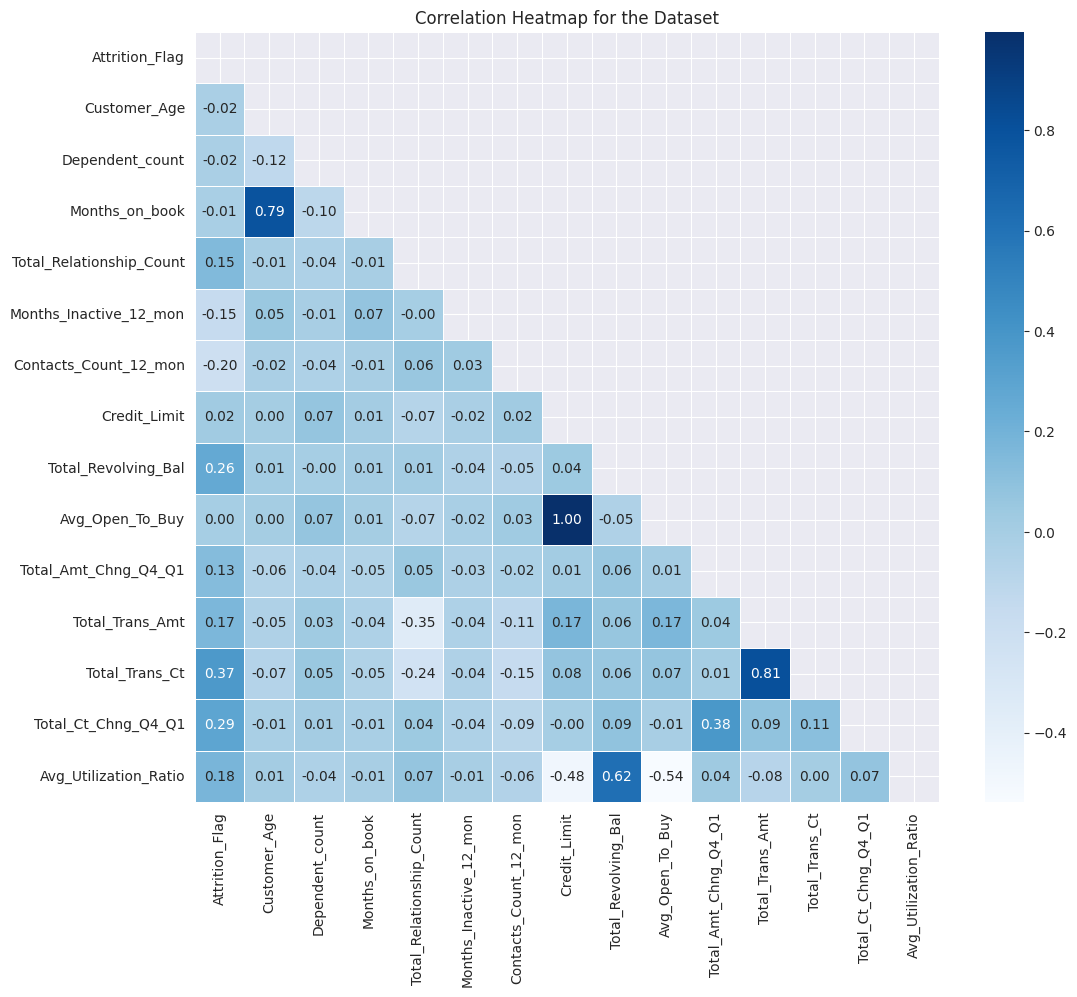

In [26]:
plt.figure(figsize=(12,10))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

sns.heatmap(correlation_matrix, annot=True, cmap='Blues', fmt='.2f', linewidths=.5, mask=mask)
plt.title('Correlation Heatmap for the Dataset')
plt.show()

In [27]:
df.describe()

,Attrition_Flag,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,0.839340,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,0.367235,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,0.000000,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,1.000000,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,1.000000,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,1.000000,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,1.000000,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


**There are "outliers" in some columns, you can see the huge difference between mean and max values. I will plot one of them and detect all of them**

In [28]:
import plotly.express as px
fig = px.box(df, x='Customer_Age')
fig.show()

In [29]:
q1 = df['Customer_Age'].quantile(.25)
q3 = df['Customer_Age'].quantile(.75)
iqr = q3-q1

lower = q1-(iqr*1.5)
upper = q3+(iqr*1.5)
lower, upper

(24.5, 68.5)

In [30]:
# change the outliers value 
df.loc[((df['Customer_Age']>upper), 'Customer_Age')] = upper

In [31]:
# number of outliers after changing their values
print('Number of outliers in Customer Age column:',len(df.loc[(df['Customer_Age']>upper)|(df['Customer_Age']<lower)]))

Number of outliers in Customer Age column: 0


In [32]:
q1 = df['Months_on_book'].quantile(.25)
q3 = df['Months_on_book'].quantile(.75)
iqr = q3-q1

lower = q1-(iqr*1.5)
upper = q3+(iqr*1.5)
lower, upper

(17.5, 53.5)

In [33]:
df.loc[((df['Months_on_book']>upper), 'Months_on_book')] = upper
df.loc[((df['Months_on_book']<lower), 'Months_on_book')] = lower

In [34]:
print('Number of outliers in Months_on_book column:',len(df.loc[(df['Months_on_book']>upper)|(df['Months_on_book']<lower)]))

Number of outliers in Months_on_book column: 0


In [35]:
q1 = df['Credit_Limit'].quantile(.25)
q3 = df['Credit_Limit'].quantile(.75)
iqr = q3-q1

lower = q1-(iqr*1.5)
upper = q3+(iqr*1.5)
lower, upper

(-10213.75, 23836.25)

In [36]:
df.loc[((df['Credit_Limit']>upper), 'Credit_Limit')] = df['Credit_Limit'].mean()

In [37]:
print('Number of outliers in Credit_Limit column:',len(df.loc[(df['Credit_Limit']>upper)|(df['Credit_Limit']<lower)]))

Number of outliers in Credit_Limit column: 0


In [38]:
q1 = df['Avg_Open_To_Buy'].quantile(.25)
q3 = df['Avg_Open_To_Buy'].quantile(.75)
iqr = q3-q1

lower = q1-(iqr*1.5)
upper = q3+(iqr*1.5)
lower, upper

(-11477.25, 22660.75)

In [39]:
df.loc[((df['Avg_Open_To_Buy']>upper), 'Avg_Open_To_Buy')] = df['Avg_Open_To_Buy'].mean()

In [40]:
print('Number of outliers in Avg_Open_To_Buy column:',len(df.loc[(df['Avg_Open_To_Buy']>upper)|(df['Avg_Open_To_Buy']<lower)]))

Number of outliers in Avg_Open_To_Buy column: 0


In [41]:
q1 = df['Total_Amt_Chng_Q4_Q1'].quantile(.25)
q3 = df['Total_Amt_Chng_Q4_Q1'].quantile(.75)
iqr = q3-q1

lower = q1-(iqr*1.5)
upper = q3+(iqr*1.5)
lower, upper

(0.28900000000000003, 1.201)

In [42]:
df.loc[((df['Total_Amt_Chng_Q4_Q1']>upper), 'Total_Amt_Chng_Q4_Q1')] = df['Total_Amt_Chng_Q4_Q1'].mean()
df.loc[((df['Total_Amt_Chng_Q4_Q1']<lower), 'Total_Amt_Chng_Q4_Q1')] = df['Total_Amt_Chng_Q4_Q1'].mean()

In [43]:
print('Number of outliers in Total_Amt_Chng_Q4_Q1 column:',len(df.loc[(df['Total_Amt_Chng_Q4_Q1']>upper)|(df['Total_Amt_Chng_Q4_Q1']<lower)]))

Number of outliers in Total_Amt_Chng_Q4_Q1 column: 0


In [44]:
q1 = df['Total_Trans_Amt'].quantile(.25)
q3 = df['Total_Trans_Amt'].quantile(.75)
iqr = q3-q1

lower = q1-(iqr*1.5)
upper = q3+(iqr*1.5)
lower, upper

(-1722.75, 8619.25)

In [45]:
df.loc[((df['Total_Trans_Amt']>upper), 'Total_Trans_Amt')] = df['Total_Trans_Amt'].mean()

In [46]:
print('Number of outliers in Total_Trans_Amt column:',len(df.loc[(df['Total_Trans_Amt']>upper)|(df['Total_Trans_Amt']<lower)]))

Number of outliers in Total_Trans_Amt column: 0


In [47]:
q1 = df['Total_Trans_Ct'].quantile(.25)
q3 = df['Total_Trans_Ct'].quantile(.75)
iqr = q3-q1

lower = q1-(iqr*1.5)
upper = q3+(iqr*1.5)
lower, upper

(-9.0, 135.0)

In [48]:
df.loc[((df['Total_Trans_Ct']>upper), 'Total_Trans_Ct')] = upper

In [49]:
print('Number of outliers in Total_Trans_Ct column:',len(df.loc[(df['Total_Trans_Ct']>upper)|(df['Total_Trans_Ct']<lower)]))

Number of outliers in Total_Trans_Ct column: 0


In [50]:
q1 = df['Total_Ct_Chng_Q4_Q1'].quantile(.25)
q3 = df['Total_Ct_Chng_Q4_Q1'].quantile(.75)
iqr = q3-q1

lower = q1-(iqr*1.5)
upper = q3+(iqr*1.5)
lower, upper

(0.22799999999999998, 1.172)

In [51]:
df.loc[((df['Total_Ct_Chng_Q4_Q1']>upper), 'Total_Ct_Chng_Q4_Q1')] = df['Total_Ct_Chng_Q4_Q1'].mean()
df.loc[((df['Total_Ct_Chng_Q4_Q1']<lower), 'Total_Ct_Chng_Q4_Q1')] = df['Total_Ct_Chng_Q4_Q1'].mean()

In [52]:
print('Number of outliers in Total_Ct_Chng_Q4_Q1 column:',len(df.loc[(df['Total_Ct_Chng_Q4_Q1']>upper)|(df['Total_Ct_Chng_Q4_Q1']<lower)]))

Number of outliers in Total_Ct_Chng_Q4_Q1 column: 0


# **Data Preprocessing**

In [53]:
X,y = df.drop(['Attrition_Flag'], axis=1), df['Attrition_Flag']

In [54]:
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=.2,random_state=42, stratify=y)

In [55]:
le = LabelEncoder()

In [56]:
for col in X_train.columns:
    if X_train[col].dtype == 'object':
        X_train[col] = le.fit_transform(X_train[col])
        X_test[col] = le.fit_transform(X_test[col])

In [57]:
scaler = StandardScaler() # to normalize data 
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# **Modeling**

In [58]:
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

GaussianNB()

In [59]:
y_pred = nb_classifier.predict(X_test)

# **Evaluation**

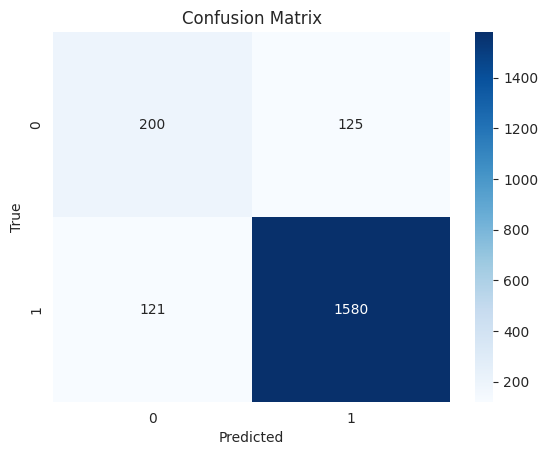

In [60]:
sns.heatmap(confusion_matrix(y_test, y_pred)
, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [61]:
print(f'Accuracy of The model : {accuracy_score(y_test, y_pred)*100:.2f} %')
print(f'Precision Score of The model : {precision_score(y_test, y_pred)*100:.2f} %')
print(f'Recall Score Score of The model : {recall_score(y_test, y_pred)*100:.2f} %')
print(f'F1 Score of The model : {f1_score(y_test, y_pred)*100:.2f} %')

Accuracy of The model : 87.86 %
Precision Score of The model : 92.67 %
Recall Score Score of The model : 92.89 %
F1 Score of The model : 92.78 %


**There are anthore types from Naive Bayes, you can check this** https://scikit-learn.org/stable/modules/naive_bayes.html